In [1]:
import os
import PyPDF2
import fitz

In [2]:
dir = 'annoted_sustainability_reports/Healthcare'
 

In [3]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)


annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf
Document('annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf')
['From 2012 to 2020, we achieved a 26% reduction in absolute emissions', ' In 2021, we achieved a 9% absolute emissions reduction versus 2020', ' This reduction was partially driven by energy e�ciency improvements and an increase in the use of renewable electricity including the startup of our solar array in Kinsale', '\xa0 In 2021, 9', '6% of our purchased electricity came from renewable sources', '\xa0A large portion of this renewable electricity is delivered through our utility providers to our sites in Alcobendas, Spain; Kinsale, Ireland; and Bracknell, UK', 'In 2021, we reduced our energy consumption by 2', '9%,In 2021, 9', '6% of our purchased electricity was secured from renewable sources', ' We have reduced GHG emissions at key facilities by leveraging solar energy', ' These projects include: Kinsal

In [4]:
#Extracting all sentences from the file
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
    total_sentences = t.split('.')
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf
132
annoted_sustainability_reports/Healthcare/UnitedHealthGroup_2021-sustainability-report.pdf
1214
annoted_sustainability_reports/Healthcare/Merck_2021_ESG_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


3179
annoted_sustainability_reports/Healthcare/BristolMyersSquibb_2020_ESG.pdf
1543
annoted_sustainability_reports/Healthcare/Danaher_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1130
annoted_sustainability_reports/Healthcare/johnsonandjohnson_2021-health-for-humanity-report-pdf.pdf
3300
annoted_sustainability_reports/Healthcare/Pfizer_NetZero_2022_update.pdf
139
annoted_sustainability_reports/Healthcare/Abbott_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


2801
annoted_sustainability_reports/Healthcare/ThermoFisherScientifiic_2021_CSR_report.pdf
1060
annoted_sustainability_reports/Healthcare/Amgen_2021_ESG_report.pdf
1596


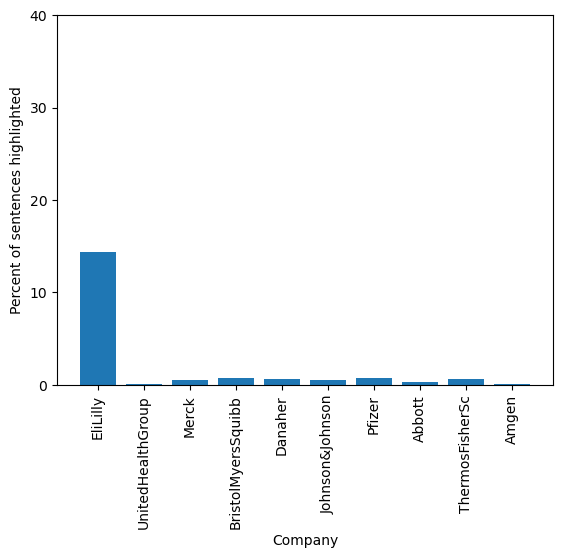

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["EliLilly", "UnitedHealthGroup", "Merck", "BristolMyersSquibb", "Danaher", "Johnson&Johnson", "Pfizer", "Abbott", "ThermosFisherSc", "Amgen"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [9]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      1.869042
std       4.406674
min       0.082372
25%       0.388974
50%       0.577114
75%       0.699767
max      14.393939
dtype: float64

In [11]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

HC_reltext = rel_text
HC_alltext = all_text

%store HC_reltext
%store HC_alltext

Stored 'HC_reltext' (list)
Stored 'HC_alltext' (list)
